# Synthetic binder dataset quick peek

This notebook shows how to load the synthetic binder dataset outputs produced by the pipeline.

In [1]:
import os
from dataset_processing.utils import PublicTcrHlaCsrReader
from pathlib import Path
import json
import numpy as np
import pandas as pd
import tensorflow as tf
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
import seaborn as sns
from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score, roc_auc_score

2026-02-10 09:14:38.158582: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-10 09:14:38.192524: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-10 09:14:38.912832: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [ ]:

base = Path("../data/nikolay/synthetic/synthetic/binder_set/b100/n10/N100000")
meta_path = base / "synthetic_meta.json"

with meta_path.open("r", encoding="utf-8") as fh:
    meta = json.load(fh)

meta

{'synthetic': True,
 'donor_matrix': '/mnt/ceph-hdd/projects/scc_mgmn_soeding/autotcr/TCRtyper/data/export_train_dataset/donor_hla_matrix.npz',
 'dataset_size': 100000,
 'b_size': 100,
 'n_donors': 10,
 'seed': 13,
 'binder_sampling': 'rank_stratified',
 'binder_score_source': 'freqs',
 'binder_sets': 'synthetic_binder_sets.npy',
 'donor_indices': 'synthetic_donor_indices.npy',
 'alleles': 440,
 'donors': 3871,
 'nonzero_alleles': 440,
 'allele_counts': [1640,
  1230,
  1005,
  875,
  834,
  820,
  779,
  742,
  679,
  618,
  588,
  586,
  469,
  430,
  428,
  419,
  381,
  378,
  366,
  358,
  342,
  320,
  274,
  263,
  254,
  252,
  249,
  233,
  226,
  207,
  203,
  188,
  182,
  181,
  180,
  178,
  168,
  165,
  163,
  157,
  152,
  142,
  137,
  132,
  125,
  113,
  113,
  112,
  107,
  106,
  105,
  93,
  90,
  89,
  88,
  83,
  71,
  69,
  60,
  57,
  56,
  54,
  53,
  52,
  51,
  49,
  47,
  46,
  46,
  46,
  44,
  42,
  40,
  40,
  38,
  36,
  35,
  34,
  33,
  31,
  29,
  2

In [2]:
binder_sets = np.load(base / "synthetic_binder_sets.npy", mmap_mode="r")
donor_indices = np.load(base / "synthetic_donor_indices.npy", mmap_mode="r")

print("binder_sets shape:", binder_sets.shape, "dtype:", binder_sets.dtype)
# binder_sets shape: (100000, 100) dtype: int32
print("donor_indices shape:", donor_indices.shape, "dtype:", donor_indices.dtype)
# donor_indices shape: (100000, 10) dtype: int32

print("first binder set:", binder_sets[0])
'''
first binder set: [  3  11  14  24  36  37  46  50  51  55  64  72  89 102 104 112 125 126
 128 129 131 139 141 143 145 147 150 152 158 162 163 171 189 192 194 195
 197 199 207 209 212 216 218 221 223 225 227 228 247 253 257 262 264 271
 274 280 282 284 286 293 296 300 313 314 315 318 321 322 327 332 333 336
 337 338 339 340 344 352 354 363 373 375 380 388 391 394 395 400 401 402
 403 412 413 417 420 421 425 428 432 435]
'''
print("first donor indices:", donor_indices[0])
# first donor indices: [3380 2994 3043 3630 1050 2988 3650 2743 2056 1444]

binder_sets shape: (100000, 100) dtype: int32
donor_indices shape: (100000, 10) dtype: int32
first binder set: [  3  11  14  24  36  37  46  50  51  55  64  72  89 102 104 112 125 126
 128 129 131 139 141 143 145 147 150 152 158 162 163 171 189 192 194 195
 197 199 207 209 212 216 218 221 223 225 227 228 247 253 257 262 264 271
 274 280 282 284 286 293 296 300 313 314 315 318 321 322 327 332 333 336
 337 338 339 340 344 352 354 363 373 375 380 388 391 394 395 400 401 402
 403 412 413 417 420 421 425 428 432 435]
first donor indices: [3380 2994 3043 3630 1050 2988 3650 2743 2056 1444]


In [3]:
from dataset_processing.utils import PublicTcrHlaCsrReader
import numpy as np
import os
h5_path = os.path.join(base, 'synthetic_tcr_hla_counts.h5')
# --- 1. The Fix: Call .iter_rows() explicitly ---
with PublicTcrHlaCsrReader(h5_path) as reader:
    # CHANGE: Call reader.iter_rows(stop=1)
    # This yields the row objects just like before, but allows us to limit 
    # the read to 1 row for speed since you break immediately.
    for num, row in enumerate(reader.iter_rows(stop=1)):
        if num == 0:
            break

# --- 2. The rest of your logic remains exactly the same ---
# (The 'row' object yielded has 'counts' as a dense numpy array, 
# so all your numpy operations below will work perfectly)

donor_hla_matrix = np.load('/home/amir/TCRtyper/data/nikolay/donor_hla_matrix.npz')['donor_hla_matrix']

print('total number of HLAs in counts', np.sum(np.where(row.counts > 0 , 1, 0)))

cindex = np.argwhere(row.counts > 0).flatten()
print('Counts printed', cindex)
print('Binder set printed', binder_sets[0])

print('Are all counts in binder set?', np.all(np.isin(np.argwhere(row.counts > 0).flatten(), binder_sets[0])))

print('donor indices for the first TCR', donor_indices[0])
print('list of the first donors HLAs', np.argwhere(donor_hla_matrix[donor_indices[0][0]] > 0).flatten())

print('Are all donor indices HLAs in Counts?', [
    np.all(np.isin(np.argwhere(donor_hla_matrix[donor_indices[0][d]] > 0).flatten(), cindex)) 
    for d in range(10)
])

total number of HLAs in counts 65
Counts printed [  0   1   2   3   5   6   7   8  10  11  12  13  14  16  17  19  20  23
  27  28  29  30  32  33  36  48  55  61  70 250 251 252 253 254 255 256
 257 258 259 260 261 262 263 264 265 266 268 270 271 273 274 276 278 279
 282 284 286 287 288 289 298 301 303 310 334]
Binder set printed [  3  11  14  24  36  37  46  50  51  55  64  72  89 102 104 112 125 126
 128 129 131 139 141 143 145 147 150 152 158 162 163 171 189 192 194 195
 197 199 207 209 212 216 218 221 223 225 227 228 247 253 257 262 264 271
 274 280 282 284 286 293 296 300 313 314 315 318 321 322 327 332 333 336
 337 338 339 340 344 352 354 363 373 375 380 388 391 394 395 400 401 402
 403 412 413 417 420 421 425 428 432 435]
Are all counts in binder set? False
donor indices for the first TCR [3380 2994 3043 3630 1050 2988 3650 2743 2056 1444]
list of the first donors HLAs [  0   1   2   3 250 251 252 254 256 263 265 266 271]
Are all donor indices HLAs in Counts? [True, True, True,

### Show all alleles (with counts) for the first entry

# Utility Function

In [ ]:


# --- 3. MODEL DEFINITION ---
class SparseTCRModel(tf.keras.Model):
    def __init__(self, num_tcrs, max_hlas_per_tcr, donor_hla_matrix, binder_sets, beta=4.0, mode='continuous', pad_token=-1., l2_reg_lambda=1e-5):
        """
        Initializes the TCR Binding Model.

        Args:
            num_tcrs (int): Total number of unique TCRs in the dataset.
            max_hlas_per_tcr (int): The width of the binder_sets matrix (max candidate alleles per TCR).
            donor_hla_matrix (np.ndarray): Binary matrix of shape (NumDonors, NumAlleles).
                                           1 indicates the donor has the allele, 0 otherwise.
            binder_sets (np.ndarray): Integer matrix of shape (NumTCRs, MaxHLAs).
                                      Contains indices of candidate alleles for each TCR.
                                      Padded with PAD_TOKEN.
            beta (float): The hyperparameter for the Beta prior (default 4.0).
                                      Controls the penalty for predicting false positives.
            mode (str): 'continuous' for standard sigmoid (recommended for start), 
                        'gumbel' for strict binary sampling with gradients.
            l2_reg_lambda (float): l2 reg strength on the logits. logits are pushed toward 0.0 which means probs become 0.
        """
        super().__init__()
        self.beta = beta
        self.mode = mode
        
        # Store Donor Matrix Transposed for fast gathering: (NumAlleles, NumDonors)
        self.X_T = tf.constant(donor_hla_matrix.T, dtype=tf.float32)
        
        # Store binder_sets: (NumTCRs, MaxHLAs)
        # Replace PAD_TOKEN with 0 temporarily to prevent gathering errors (masked later)
        self.binder_sets = tf.constant(np.maximum(binder_sets, 0), dtype=tf.int32)
        
        # Mask for binder_sets: (NumTCRs, MaxHLAs) - True where index != PAD_TOKEN
        self.binder_mask = tf.constant(binder_sets != pad_token, dtype=tf.float32)
        self.pad_token = pad_token
        # The Embedding Layer (The "z" parameters we want to learn)
        # We use L1 regularization to encourage sparsity (pushing z towards 0)
        # Initialize closer to 0 (prob 0.5) so gradients can flow early on.
        self.z_embedding = tf.keras.layers.Embedding(
            input_dim=num_tcrs,
            output_dim=max_hlas_per_tcr,
            #embeddings_initializer=tf.keras.initializers.RandomUniform(minval=-2, maxval=-0.5),
            embeddings_initializer=tf.keras.initializers.RandomNormal(mean=-1.25, stddev=-0.75),
            name="z_values"
        )
        self.l2_reg_lambda = l2_reg_lambda
        # Add metric trackers
        self.loss_tracker = tf.keras.metrics.Mean(name="loss")
        self.final_loss_tracker = tf.keras.metrics.Mean(name="final_loss")
        self.reg_tracker = tf.keras.metrics.Mean(name="reg_term")

    def l2_reg(self, z_logits, mask):
        if self.l2_reg_lambda:
            reg = self.l2_reg_lambda * tf.reduce_sum(tf.pow(z_logits, 2) * mask)
        else:
            reg = 0.
        return reg


    def get_z_probabilities(self, z_logits, mask):
        """
        Toggles between continuous relaxation and binary sampling based on self.mode.
        """
        if self.mode == 'continuous':
            # Standard sigmoid probability [0, 1]
            return tf.sigmoid(z_logits) * mask
        
        elif self.mode == 'gumbel':
            # Gumbel-Softmax Trick:
            # We treat this as a Bernoulli distribution (Bind vs Not Bind)
            # hard=True makes it return exactly 0.0 or 1.0 in the forward pass
            dist = tfp.distributions.RelaxedBernoulli(temperature=0.5, logits=z_logits)
            z_sampled = dist.sample()
            
            # Straight-Through implementation for hard binary in forward pass
            # but soft gradient in backward pass
            z_hard = tf.cast(tf.greater(z_sampled, 0.5), tf.float32)
            z_final = tf.stop_gradient(z_hard - z_sampled) + z_sampled
            
            return z_final * mask
        else:
            raise ValueError(f"Unknown mode: {self.mode}")

    def call(self, inputs):
        """
        Computes the Negative Log Likelihood loss for a batch of TCRs.

        Args:
            inputs (tuple): A tuple containing two tensors:
                1. tcr_idx (tf.Tensor): indices of TCRs in current batch.
                2. pos_donor_indices (tf.Tensor): indices of donors where TCRs were observed.

        Returns:
            loss (tf.Tensor): The mean Negative Log Likelihood for the batch.
        """
        tcr_idx, pos_donor_indices = inputs
        
        # --- A. GATHER DATA ---
        batch_binder_indices = tf.gather(self.binder_sets, tcr_idx) # (Batch, MaxHLAs)
        batch_mask = tf.gather(self.binder_mask, tcr_idx)           # (Batch, MaxHLAs)
        z_logits = self.z_embedding(tcr_idx)                        # (Batch, MaxHLAs)
        
        # --- B. COMPUTE p_ni (Prob TCR i binds in Donor n) ---
        
        # 1. Get HLA data for relevant alleles: (Batch, MaxHLAs, NumDonors)
        relevant_x = tf.gather(self.X_T, batch_binder_indices)
        
        # 2. Compute Prob(No Binding for Allele a)
        # This handles the z_ia part. If mode='gumbel', these are 0 or 1.
        z_prob = self.get_z_probabilities(z_logits, batch_mask)
        z_prob_expanded = tf.expand_dims(z_prob, axis=-1)
        regularization_term = self.l2_reg(z_logits, batch_mask)
        
        # Safe Term Calculation (Prevents Gradient Explosion)
        # We ensure the term inside log is never closer to 0 than 1e-7
        # term: 1 - x_na * z_ia
        term_raw = 1.0 - (relevant_x * z_prob_expanded)
        term_safe = tf.maximum(term_raw, 1e-7)
        
        # 3. Product over alleles (Sum of Logs)
        # log_prod = sum(ln(1 - xz))
        log_term = tf.math.log(term_safe)
        log_prod = tf.reduce_sum(log_term, axis=1) # Sum over alleles axis
        
        # 4. p_ni: Prob that AT LEAST ONE binding occurs
        # p_ni = 1 - exp(sum(ln(1-xz)))
        # We calculate p_ni safely without hard clipping killing the gradient
        p_ni = 1.0 - tf.exp(log_prod)
        # Add a tiny epsilon to p_ni for the NEXT log step, 
        # but done in a way that preserves gradient flow
        p_ni_safe = tf.maximum(p_ni, 1e-7)

        # --- C. CALCULATE LIKELIHOOD ---
        
        # 1. Positive Donors (Reward)
        safe_pos_indices = tf.maximum(pos_donor_indices, 0)
        pos_mask = tf.cast(tf.not_equal(pos_donor_indices, tf.cast(self.pad_token, tf.int32)), tf.float32)
        
        # Gather p_ni for the donors where TCR was actually found
        p_pos = tf.gather(p_ni_safe, safe_pos_indices, batch_dims=1)
        
        # Sum y_ni * ln(p_ni)
        reward = tf.reduce_sum(tf.math.log(p_pos) * pos_mask, axis=1)

        # 2. Negative Donors (Penalty via Beta-Binomial approximation)
        n_i = tf.reduce_sum(pos_mask, axis=1)               # Observed count (k)
        sum_p_all = tf.reduce_sum(p_ni_safe, axis=1)             # Expected count (total)
        sum_p_pos = tf.reduce_sum(p_pos * pos_mask, axis=1) # Expected count (positives)
        n_tilde = sum_p_all - sum_p_pos                     # Expected count (negatives)

        # Log-Gamma approximation of the product sequence
        # Corresponds to - sum(ln(k + N_tilde + beta)) in the document
        penalty = (tf.math.lgamma(n_tilde + self.beta) - 
                   tf.math.lgamma(n_i + n_tilde + self.beta + 1.0))

        log_likelihood = reward + penalty
        
        # Minimize Negative Log Likelihood
        return -tf.reduce_mean(log_likelihood), regularization_term
    @property
    def metrics(self):
        return [self.loss_tracker, self.final_loss_tracker, self.reg_tracker]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            loss, regularization_term = self(data, training=True)
            final_loss = loss + regularization_term
        
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(final_loss, trainable_vars)  # Note: use final_loss here if you want reg in gradients
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        
        # Update trackers
        self.loss_tracker.update_state(loss)
        self.final_loss_tracker.update_state(final_loss)
        self.reg_tracker.update_state(regularization_term)
        
        return {m.name: m.result() for m in self.metrics}

# --- 4. CREATE DATASET ---
def create_dataset(donor_indices, batch_size):
    tcr_ids = np.arange(donor_indices.shape[0], dtype=np.int32)
    
    # Create dataset from tensor slices
    dataset = tf.data.Dataset.from_tensor_slices((tcr_ids, donor_indices))
    
    # Shuffle, Batch, and Prefetch for performance
    dataset = dataset.shuffle(buffer_size=10000)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset



def assess_explanation_for_donors(model, donor_indices, donor_hla_matrix, batch_size=1024, output_path=None, pad_token=-1.):
    """
    Checks if we can explain the presence of each TCR in its donors at various levels of strictness.
    
    Logic:
    1. For each TCR, look at every donor it was found in.
    2. For each donor, calculate the max probability assigned to any of their HLAs.
    3. Aggregate these scores to determine if 100%, 90%, 80%, ... 0% of donors are explained.
    
    Args:
        model: Trained SparseTCRModel (to get embeddings).
        donor_indices: (Num_TCRs, Max_Donors) int32 array, padded with -1.
        donor_hla_matrix: (Num_Donors, Num_Alleles) binary array (0/1).
        batch_size: Number of TCRs to process at once for memory efficiency.
        output_path: Directory path to save all outputs. If None, displays plots instead.
        
    Returns:
        donor_scores (np.array): Matrix of shape (Num_TCRs, Max_Donors).
                                 Contains the max prob for each donor.
                                 Padded slots are set to -1.0.
    """
    # Create output directory if specified
    if output_path is not None:
        os.makedirs(output_path, exist_ok=True)
        report_lines = []
    
    def log(message):
        """Helper to print and optionally save to report."""
        print(message)
        if output_path is not None:
            report_lines.append(message)
    
    log(f"\n{'='*60}")
    log("ASSESSING DONOR EXPLANATION (COMPREHENSIVE ROBUSTNESS)")
    log(f"{'='*60}")
    
    num_tcrs = donor_indices.shape[0]
    
    # 1. Prepare Data
    donor_hla_tensor = tf.constant(donor_hla_matrix, dtype=tf.float32)
    all_donor_scores = []
    
    # 2. Batched Processing
    log(f"Processing {num_tcrs} TCRs in batches of {batch_size}...")
    num_batches = int(np.ceil(num_tcrs / batch_size))
    
    for i in range(num_batches):
        start = i * batch_size
        end = min((i + 1) * batch_size, num_tcrs)
        
        # --- A. Get Data for Batch ---
        batch_tcr_idx = tf.range(start, end, dtype=tf.int32)
        batch_donor_indices = donor_indices[start:end] 
        
        logits = model.z_embedding(batch_tcr_idx)
        probs = tf.sigmoid(logits)
        candidate_indices = tf.gather(model.binder_sets, batch_tcr_idx)
        prob_mask = tf.gather(model.binder_mask, batch_tcr_idx)
        probs = probs * prob_mask
        
        # --- B. Match TCR Candidates to Donor HLAs ---
        valid_donor_mask = (batch_donor_indices != pad_token)
        safe_donor_indices = np.maximum(batch_donor_indices, 0)
        
        batch_donor_hlas = tf.gather(donor_hla_tensor, safe_donor_indices)
        
        # Tile candidates to match (Batch, Donors) structure
        num_donors = batch_donor_indices.shape[1]
        candidates_expanded = tf.expand_dims(candidate_indices, 1)
        candidates_tiled = tf.tile(candidates_expanded, [1, num_donors, 1])
        
        # Gather logic: (Batch, Donors, Alleles) -> (Batch, Donors, Candidates)
        donor_has_candidate = tf.gather(batch_donor_hlas, candidates_tiled, batch_dims=2)
        
        # Calculate Scores
        probs_expanded = tf.expand_dims(probs, 1)
        explanation_scores = probs_expanded * donor_has_candidate
        
        # Max Explanation per Donor
        max_score_per_donor = tf.reduce_max(explanation_scores, axis=2)
        
        # Handle Padding (-1.0 for invalid donors)
        scores_masked = tf.where(valid_donor_mask, max_score_per_donor, pad_token)
        
        all_donor_scores.append(scores_masked.numpy())
        
        if i % 10 == 0:
            print(f"  Batch {i}/{num_batches} done...", end='\r')

    donor_scores_matrix = np.concatenate(all_donor_scores)
    
    # --- 3. Statistical Analysis ---
    log("\n\nAnalysis Complete. Generating Comprehensive Report...")
    
    thresholds = np.linspace(0.01, 0.99, 100)
    
    # Dictionary to store curves for all deciles
    # Keys: 100, 90, 80 ... 10, 1 (At least one)
    curves = {level: [] for level in range(100, 9, -10)}
    curves[1] = [] # Special case for ">= 1 donor"
    
    # Pre-calculate counts
    total_donors_per_tcr = np.sum(donor_scores_matrix != pad_token, axis=1)
    total_donors_per_tcr = np.maximum(total_donors_per_tcr, 1)
    
    for t in thresholds:
        is_explained = (donor_scores_matrix > t)
        num_explained = np.sum(is_explained, axis=1)
        fraction_explained = num_explained / total_donors_per_tcr
        
        # Calculate % of TCRs meeting criteria for each decile
        for level in curves.keys():
            if level == 100:
                perc = np.mean(fraction_explained == 1.0) * 100
            elif level == 1:
                perc = np.mean(num_explained >= 1) * 100 # At least 1 donor
            else:
                perc = np.mean(fraction_explained >= (level / 100.0)) * 100
            
            curves[level].append(perc)

    # --- 4. Visualization ---
    fig = plt.figure(figsize=(20, 6))
    
    # Plot 1: The "Rainbow" Explanation Curve
    plt.subplot(1, 3, 1)
    
    # Color palette (Purple=Strict -> Yellow=Relaxed)
    colors = plt.cm.viridis(np.linspace(0, 1, 11))
    
    # Plot strictly ordered: 100 down to 10
    for i, level in enumerate(range(100, 9, -10)):
        label_text = "100% Donors" if level == 100 else f"≥ {level}% Donors"
        plt.plot(thresholds, curves[level], color=colors[i], linewidth=2, label=label_text)
    
    # Plot ">= 1 Donor" as a distinct grey line
    plt.plot(thresholds, curves[1], color='grey', linewidth=2, linestyle='--', label="≥ 1 Donor")
    
    plt.title("Explanation Robustness Spectrum")
    plt.xlabel("Binarization Threshold (z_i)")
    plt.ylabel("% TCRs satisfying condition")
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    # Plot 2: Histogram of Critical Scores
    masked_scores = np.ma.masked_equal(donor_scores_matrix, pad_token)
    min_scores = np.min(masked_scores, axis=1)
    min_scores = min_scores.filled(0.0)
    
    plt.subplot(1, 3, 2)
    plt.hist(min_scores, bins=50, color='#d65f5f', edgecolor='white', range=(0,1))
    plt.title("Critical Score Distribution\n(Min Prob across all donors)")
    plt.xlabel("Probability")
    plt.ylabel("Count of TCRs")
    plt.grid(axis='y', alpha=0.3)
    
    # Plot 3: Fraction Explained at T=0.5
    check_t = 0.5
    is_explained_check = (donor_scores_matrix > check_t)
    num_explained_check = np.sum(is_explained_check, axis=1)
    fractions_check = num_explained_check / total_donors_per_tcr
    
    plt.subplot(1, 3, 3)
    plt.hist(fractions_check * 100, bins=20, color='#4c72b0', edgecolor='white', range=(0,100))
    plt.title(f"Fraction of Donors Explained\n(at Threshold={check_t})")
    plt.xlabel("% of Donors Explained")
    plt.ylabel("Count of TCRs")
    plt.axvline(x=100, color='purple', linestyle='--', label='Perfect')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    
    # --- 5. SAVE OR DISPLAY ---
    if output_path is not None:
        # Save the figure
        plot_path = os.path.join(output_path, "donor_explanation_plots.png")
        fig.savefig(plot_path, dpi=150, bbox_inches='tight')
        log(f"Plots saved to: {plot_path}")
        
        # Also save as PDF for high quality
        plot_pdf_path = os.path.join(output_path, "donor_explanation_plots.pdf")
        fig.savefig(plot_pdf_path, bbox_inches='tight')
        log(f"Plots (PDF) saved to: {plot_pdf_path}")
        
        plt.close(fig)
    else:
        plt.show()

    # --- 6. Full Statistical Report ---
    log("\n" + "="*100)
    log(f"COMPREHENSIVE STATISTICAL REPORT: DONOR EXPLANATION (Total TCRs: {num_tcrs})")
    log("="*100)
    
    # Define columns for the report table
    columns = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 1]
    header = f"{'Threshold':<10} | " + " | ".join([f"{f'{c}%' if c==100 else f'>={c}%':<7}" for c in columns])
    log(header)
    log("-" * 120)
    
    def get_val_at_t(arr, t):
        idx = int(t * 100) 
        if idx >= len(arr): idx = pad_token
        return arr[idx]
        
    checkpoints = [0.01, 0.05, 0.10, 0.20, 0.50]
    
    for t in checkpoints:
        row_str = f"{t:<10} | "
        values = []
        for col in columns:
            val = get_val_at_t(curves[col], t)
            values.append(f"{val:6.2f}")
        row_str += " | ".join(values)
        log(row_str)
        
    log("-" * 120)
    
    # B. Detailed Analysis at T=0.5 
    log("\n[Detailed Breakdown at Threshold = 0.5]")
    t_val = 0.5
    is_expl = (donor_scores_matrix > t_val)
    n_expl = np.sum(is_expl, axis=1)
    fracs = n_expl / total_donors_per_tcr
    
    perfect_count = np.sum(fracs == 1.0)
    very_high_count = np.sum((fracs >= 0.9) & (fracs < 1.0))
    high_count = np.sum((fracs >= 0.8) & (fracs < 0.9))
    moderate_count = np.sum((fracs >= 0.5) & (fracs < 0.8))
    low_count = np.sum((fracs > 0.0) & (fracs < 0.5))
    failed_count = np.sum(fracs == 0.0)
    
    log(f"  > Perfect (100% donors):       {perfect_count} TCRs")
    log(f"  > Very High (90-99% donors):   {very_high_count} TCRs")
    log(f"  > High (80-89% donors):        {high_count} TCRs")
    log(f"  > Moderate (50-79% donors):    {moderate_count} TCRs")
    log(f"  > Low (1-49% donors):          {low_count} TCRs")
    log(f"  > Failed (0% donors):          {failed_count} TCRs")
    log("-" * 100)
    
    # --- 7. SAVE ADDITIONAL DATA FILES ---
    if output_path is not None:
        # Save the report
        report_path = os.path.join(output_path, "donor_explanation_report.txt")
        with open(report_path, 'w') as f:
            f.write('\n'.join(report_lines))
        log(f"Report saved to: {report_path}")
        
        # Save explanation curves as CSV
        curves_csv_path = os.path.join(output_path, "explanation_curves.csv")
        curve_data = np.column_stack([thresholds] + [curves[level] for level in columns])
        curve_header = 'threshold,' + ','.join([f'pct_{c}_donors' for c in columns])
        np.savetxt(curves_csv_path, curve_data, delimiter=',', header=curve_header, comments='')
        log(f"Explanation curves saved to: {curves_csv_path}")
        
        # Save per-TCR donor scores summary
        tcr_summary_path = os.path.join(output_path, "tcr_donor_summary.csv")
        max_scores_per_tcr = np.max(np.where(donor_scores_matrix == pad_token, -np.inf, donor_scores_matrix), axis=1)
        max_scores_per_tcr = np.where(max_scores_per_tcr == -np.inf, pad_token, max_scores_per_tcr)
        tcr_summary = np.column_stack([
            np.arange(num_tcrs),
            total_donors_per_tcr,
            n_expl,
            fracs,
            min_scores,
            max_scores_per_tcr
        ])
        tcr_summary_header = 'tcr_index,num_donors,num_explained_t005,fraction_explained_t005,min_score,max_score'
        np.savetxt(tcr_summary_path, tcr_summary, delimiter=',', header=tcr_summary_header, comments='')
        log(f"TCR donor summary saved to: {tcr_summary_path}")
        
        # Save full donor scores matrix
        scores_path = os.path.join(output_path, "donor_scores_matrix.npz")
        np.savez_compressed(scores_path, 
                           donor_scores=donor_scores_matrix,
                           thresholds=thresholds,
                           total_donors_per_tcr=total_donors_per_tcr)
        log(f"Donor scores matrix saved to: {scores_path}")
        
        # Save breakdown statistics as JSON-like text
        stats_path = os.path.join(output_path, "breakdown_statistics.csv")
        breakdown_data = np.array([
            ['perfect_100pct', perfect_count],
            ['very_high_90_99pct', very_high_count],
            ['high_80_89pct', high_count],
            ['moderate_50_79pct', moderate_count],
            ['low_1_49pct', low_count],
            ['failed_0pct', failed_count]
        ])
        np.savetxt(stats_path, breakdown_data, delimiter=',', header='category,tcr_count', comments='', fmt='%s')
        log(f"Breakdown statistics saved to: {stats_path}")
    
    # Return summary statistics along with the donor scores matrix
    summary_stats = {
        'num_tcrs': num_tcrs,
        'perfect_100pct': int(perfect_count),
        'very_high_90_99pct': int(very_high_count),
        'high_80_89pct': int(high_count),
        'moderate_50_79pct': int(moderate_count),
        'low_1_49pct': int(low_count),
        'failed_0pct': int(failed_count),
        'mean_fraction_explained_t005': float(np.mean(fracs)),
        'median_fraction_explained_t005': float(np.median(fracs)),
    }
    
    return donor_scores_matrix, summary_stats


def analyze_model_predictions(model, binder_sets, num_total_alleles, threshold=0.5, output_path=None, pad_token=-1.):
    """
    Full analysis pipeline with detailed statistical reporting and visualization.
    
    Args:
        model: The trained Keras model.
        binder_sets: The (NumTCRs, MaxHLAs) index matrix.
        num_total_alleles: Total number of unique alleles in the universe (e.g., 440).
        threshold: Decision threshold for binarization.
        output_path: Directory path to save all outputs. If None, displays plots instead.
    """
    # Create output directory if specified
    if output_path is not None:
        os.makedirs(output_path, exist_ok=True)
        report_lines = []
    
    def log(message):
        """Helper to print and optionally save to report."""
        print(message)
        if output_path is not None:
            report_lines.append(message)
    
    log("\n" + "="*50)
    log("STARTING MODEL ANALYSIS")
    log("="*50)

    # --- 1. DATA EXTRACTION ---
    log("Extracting probabilities...")
    trained_logits = model.z_embedding.get_weights()[0]
    trained_probs = tf.sigmoid(trained_logits).numpy()
    
    # Handle Padding: Create masks
    valid_mask = (binder_sets != pad_token)
    
    # viz_probs: Padding becomes -1.0 (for visualization/filtering)
    viz_probs = trained_probs.copy()
    viz_probs[~valid_mask] = pad_token 
    
    # analysis_probs: Padding becomes 0.0 (for accurate counts)
    analysis_probs = trained_probs.copy()
    analysis_probs[~valid_mask] = 0.0

    # --- 2. THRESHOLD OPTIMIZATION REPORT ---
    log("\n--- [REPORT] Threshold Optimization Analysis ---")
    
    threshold_range = np.linspace(0.01, 0.999, 1000)
    coverages = []
    avg_counts = []
    
    idx_99 = pad_token
    idx_95 = pad_token
    best_tradeoff_idx = pad_token
    max_tradeoff_score = -float('inf')

    for i, t in enumerate(threshold_range):
        matches = np.sum(analysis_probs > t, axis=1)
        cov = np.mean(matches > 0) * 100
        avg = np.mean(matches)
        
        coverages.append(cov)
        avg_counts.append(avg)
        
        if cov >= 99.0: idx_99 = i 
        if cov >= 95.0: idx_95 = i
            
        score = cov - (5.0 * avg)
        if score > max_tradeoff_score:
            max_tradeoff_score = score
            best_tradeoff_idx = i

    def print_stat(name, idx):
        if idx != pad_token:
            t_val = threshold_range[idx]
            c_val = coverages[idx]
            a_val = avg_counts[idx]
            log(f"Strategy: {name:<25} | Recommended Threshold: {t_val:.3f}")
            log(f"   -> Result: Coverage: {c_val:.2f}% | Avg HLAs per TCR: {a_val:.2f}")
        else:
            log(f"Strategy: {name:<25} | Impossible to achieve with current model.")

    print_stat("'Strict' (99% Coverage)", idx_99)
    print_stat("'Relaxed' (95% Coverage)", idx_95)
    print_stat("'Balanced' (Elbow Point)", best_tradeoff_idx)

    # --- 3. CURRENT THRESHOLD REPORT ---
    log(f"\n--- [REPORT] Statistics for Current Threshold ({threshold}) ---")
    
    final_decisions = (analysis_probs > threshold)
    matches_per_tcr = np.sum(final_decisions, axis=1)
    
    current_coverage = np.mean(matches_per_tcr > 0) * 100
    current_avg = np.mean(matches_per_tcr)
    current_median = np.median(matches_per_tcr)
    current_max = np.max(matches_per_tcr)
    zero_matches = np.sum(matches_per_tcr == 0)
    
    log(f"Coverage:           {current_coverage:.2f}% ({len(matches_per_tcr) - zero_matches}/{len(matches_per_tcr)} TCRs solved)")
    log(f"TCRs with 0 HLAs:   {zero_matches}")
    log(f"Avg HLAs per TCR:   {current_avg:.2f}")
    log(f"Median HLAs per TCR:{current_median}")
    log(f"Max HLAs per TCR:   {current_max}")

    # --- 4. VISUALIZATIONS ---
    log("\nGenerating plots...")
    fig = plt.figure(figsize=(18, 12))
    
# Plot 1: Histogram
    plt.subplot(2, 2, 1)
    max_probs = np.max(viz_probs, axis=1)
    # [FIX] Filter out the -1.0 padding values so we only plot real probabilities
    valid_plot_data = max_probs[max_probs >= 0.0]
    if len(valid_plot_data) > 0:
        plt.hist(valid_plot_data, bins=50, range=(0, 1), color='#4c72b0', edgecolor='white')
    else:
        plt.text(0.5, 0.5, "No Valid Data", ha='center', va='center')
    plt.axvline(x=threshold, color='red', linestyle='--', label=f'Current T={threshold}')
    plt.title("Distribution of Model Confidence")
    plt.xlabel("Max Probability per TCR")
    plt.legend()
    
    # Plot 2: Optimization Curve
    plt.subplot(2, 2, 2)
    ax1 = plt.gca()
    ax1.plot(threshold_range, coverages, 'b-', linewidth=2, label='Coverage %')
    ax1.set_xlabel('Threshold')
    ax1.set_ylabel('Coverage (%)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.grid(True, alpha=0.3)
    ax2 = ax1.twinx()
    ax2.plot(threshold_range, avg_counts, 'r--', linewidth=2, label='Avg HLAs/TCR')
    ax2.set_ylabel('Avg Count per TCR', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    if idx_95 != pad_token: ax1.axvline(threshold_range[idx_95], color='green', linestyle=':', label='95% Cov')
    ax1.legend(loc='lower left')
    plt.title("Optimization Curve")

    # Plot 3: Diversity
    plt.subplot(2, 2, 3)
    chosen_allele_ids = binder_sets[final_decisions] 
    if len(chosen_allele_ids) > 0:
        unique_ids, counts = np.unique(chosen_allele_ids, return_counts=True)
        sorted_indices = np.argsort(counts)[::-1]
        sorted_ids = unique_ids[sorted_indices]
        sorted_counts = counts[sorted_indices]
        
        top_n = min(30, len(sorted_ids))
        plt.bar(range(top_n), sorted_counts[:top_n], color='#55a868')
        plt.title(f"Top {top_n} Predicted Alleles (Diversity Check)")
        plt.xlabel("Allele Rank")
        plt.ylabel("Frequency")
        diversity_ratio = len(unique_ids) / len(np.unique(binder_sets[binder_sets != pad_token]))
        plt.text(0.95, 0.95, f"Unique Alleles Used: {len(unique_ids)}\n(Coverage of Universe: {diversity_ratio:.1%})", 
                 transform=plt.gca().transAxes, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.8))
    else:
        plt.text(0.5, 0.5, "No Alleles Selected", ha='center')

    # Plot 4: FULL UNIVERSE HEATMAP
    plt.subplot(2, 2, 4)
    log("Mapping sparse probabilities to full allele universe...")
    
    # 1. Sample TCRs
    sample_size = min(20, len(viz_probs))
    random_indices = np.random.choice(len(viz_probs), sample_size, replace=False)
    
    # 2. Extract sparse data for these samples
    subset_probs = viz_probs[random_indices] 
    subset_ids = binder_sets[random_indices]
    
    # 3. Create Dense Matrix filled with 0.0
    full_heatmap_matrix = np.full((sample_size, num_total_alleles), 0.0)
    
    # 4. Fill in the probabilities at the correct Allele ID columns
    for i in range(sample_size):
        valid_idx = subset_ids[i] != pad_token
        tcr_allele_ids = subset_ids[i][valid_idx].astype(int)
        tcr_probs = subset_probs[i][valid_idx]
        full_heatmap_matrix[i, tcr_allele_ids] = tcr_probs

    cmap = plt.cm.viridis.copy()
    cmap.set_under('lightgrey')
    
    plt.imshow(full_heatmap_matrix, aspect='auto', cmap=cmap, vmin=0.0, vmax=1.0, interpolation='nearest')
    plt.colorbar(label="Probability z_i")
    plt.title(f"Binding Probabilities (Mapped to all {num_total_alleles} Alleles)")
    plt.xlabel("Allele ID (0 to MaxAllele)")
    plt.ylabel("TCR Sample Index")

    plt.tight_layout()
    
    # --- 5. SAVE OR DISPLAY ---
    if output_path is not None:
        # Save the figure
        plot_path = os.path.join(output_path, "analysis_plots.png")
        fig.savefig(plot_path, dpi=150, bbox_inches='tight')
        log(f"Plots saved to: {plot_path}")
        
        # Also save as PDF for high quality
        plot_pdf_path = os.path.join(output_path, "analysis_plots.pdf")
        fig.savefig(plot_pdf_path, bbox_inches='tight')
        log(f"Plots (PDF) saved to: {plot_pdf_path}")
        
        plt.close(fig)
        
        # Save the report
        report_path = os.path.join(output_path, "analysis_report.txt")
        with open(report_path, 'w') as f:
            f.write('\n'.join(report_lines))
        log(f"Report saved to: {report_path}")
        
        # Save threshold optimization data as CSV
        optimization_csv_path = os.path.join(output_path, "threshold_optimization.csv")
        optimization_data = np.column_stack([threshold_range, coverages, avg_counts])
        np.savetxt(optimization_csv_path, optimization_data, delimiter=',', 
                   header='threshold,coverage_percent,avg_hlas_per_tcr', comments='')
        log(f"Optimization data saved to: {optimization_csv_path}")
        
        # Save per-TCR statistics
        tcr_stats_path = os.path.join(output_path, "tcr_statistics.csv")
        tcr_stats = np.column_stack([np.arange(len(matches_per_tcr)), matches_per_tcr, max_probs])
        np.savetxt(tcr_stats_path, tcr_stats, delimiter=',',
                   header='tcr_index,num_hlas_above_threshold,max_probability', comments='')
        log(f"TCR statistics saved to: {tcr_stats_path}")
        
        # Save numpy arrays for further analysis
        arrays_path = os.path.join(output_path, "analysis_arrays.npz")
        np.savez(arrays_path,
                 trained_probs=trained_probs,
                 analysis_probs=analysis_probs,
                 final_decisions=final_decisions,
                 matches_per_tcr=matches_per_tcr,
                 threshold_range=threshold_range,
                 coverages=np.array(coverages),
                 avg_counts=np.array(avg_counts))
        log(f"Numpy arrays saved to: {arrays_path}")
        
    else:
        plt.show()
    
    log("="*50 + "\n")
    
    # Return summary statistics
    return {
        'coverage': current_coverage,
        'avg_hlas_per_tcr': current_avg,
        'median_hlas_per_tcr': current_median,
        'max_hlas_per_tcr': current_max,
        'tcrs_with_zero_hlas': zero_matches,
        'threshold_95_coverage': threshold_range[idx_95] if idx_95 != pad_token else None,
        'threshold_99_coverage': threshold_range[idx_99] if idx_99 != pad_token else None,
        'threshold_balanced': threshold_range[best_tradeoff_idx] if best_tradeoff_idx != pad_token else None,
    }


def evaluate_model_performance(model, binder_sets, true_hla_set, num_total_alleles=440, output_path=None, pad_token=-1.):
    """
    OPTIMIZED: Calculates PR Curve, ROC Curve, and statistical metrics.
    Works directly on sparse data instead of creating dense 100k x 440 matrices.
    """
    if output_path is not None:
        os.makedirs(output_path, exist_ok=True)
    
    print(f"\n--- Starting Performance Evaluation (PR & ROC) - FAST ---")
    
    # 1. EXTRACT PREDICTIONS (sparse)
    z_logits = model.z_embedding.get_weights()[0]
    candidate_probs = tf.sigmoid(z_logits).numpy()
    
    num_tcrs = binder_sets.shape[0]
    
    # 2. BUILD SPARSE REPRESENTATION
    # Instead of 44M elements, we only work with actual candidates
    print("Building sparse label/prediction pairs...")
    
    # Get valid candidate mask
    valid_mask = (binder_sets != pad_token)
    
    # Flatten valid entries: these are our predictions
    pred_probs_sparse = candidate_probs[valid_mask]  # ~few million, not 44M
    pred_allele_ids = binder_sets[valid_mask].astype(int)
    pred_tcr_ids = np.repeat(np.arange(num_tcrs), binder_sets.shape[1])[valid_mask.flatten()]
    
    # Build a set lookup for true alleles per TCR (for fast membership testing)
    print("Building true allele lookup...")
    true_allele_sets = []
    for i in range(num_tcrs):
        valid_true = true_hla_set[i] >= 0
        true_allele_sets.append(set(true_hla_set[i][valid_true].astype(int)))
    
    # Create binary labels: is this (tcr, allele) pair a true positive?
    print("Creating sparse labels...")
    y_true_sparse = np.array([
        1 if pred_allele_ids[j] in true_allele_sets[pred_tcr_ids[j]] else 0
        for j in range(len(pred_probs_sparse))
    ], dtype=np.int32)
    
    # Count total true positives that exist (for FN calculation)
    total_true_positives = sum(len(s) for s in true_allele_sets)
    
    # 3. CALCULATE METRICS using sparse arrays (MUCH smaller than 44M)
    print(f"Calculating metrics on {len(pred_probs_sparse):,} candidate pairs (vs {num_tcrs * num_total_alleles:,} dense)...")
    
    # For ROC/PR, we need to handle the implicit zeros
    # Key insight: alleles NOT in binder_sets have pred=0 and contribute only to TN or FN
    # FN from non-candidates = total_true_positives - true_positives_in_candidates
    true_positives_in_candidates = np.sum(y_true_sparse)
    fn_from_non_candidates = total_true_positives - true_positives_in_candidates
    
    # Total negatives in the full space (for ROC's FPR denominator)
    total_negatives = num_tcrs * num_total_alleles - total_true_positives
    
    # Now compute curves on sparse data, adjusting for the implicit zeros
    
    # Sort by prediction probability (descending) for curve computation
    sorted_indices = np.argsort(-pred_probs_sparse)
    y_true_sorted = y_true_sparse[sorted_indices]
    y_pred_sorted = pred_probs_sparse[sorted_indices]
    
    # Get unique thresholds
    unique_probs = np.unique(y_pred_sorted)[::-1]  # descending
    
    # Compute curve points efficiently
    tps = np.cumsum(y_true_sorted)
    fps = np.cumsum(1 - y_true_sorted)
    
    # At each unique threshold, get the counts
    # Find indices where threshold changes
    threshold_indices = np.searchsorted(-y_pred_sorted, -unique_probs, side='right') - 1
    threshold_indices = np.clip(threshold_indices, 0, len(tps) - 1)
    
    tp_at_thresh = tps[threshold_indices]
    fp_at_thresh = fps[threshold_indices]
    fn_at_thresh = (total_true_positives - tp_at_thresh)  # includes fn_from_non_candidates
    tn_at_thresh = total_negatives - fp_at_thresh
    
    # PR Curve
    precision = tp_at_thresh / (tp_at_thresh + fp_at_thresh + 1e-10)
    recall = tp_at_thresh / (tp_at_thresh + fn_at_thresh + 1e-10)
    
    # Add endpoints for PR curve
    precision = np.concatenate([[1.0], precision, [tp_at_thresh[-1] / (tp_at_thresh[-1] + fp_at_thresh[-1] + 1e-10)]])
    recall = np.concatenate([[0.0], recall, [recall[-1]]])
    pr_thresholds = np.concatenate([[unique_probs[0] + 0.01], unique_probs, [0.0]])
    
    # ROC Curve  
    tpr = tp_at_thresh / (total_true_positives + 1e-10)
    fpr = fp_at_thresh / (total_negatives + 1e-10)
    
    # Add endpoints for ROC curve
    fpr = np.concatenate([[0.0], fpr, [1.0]])
    tpr = np.concatenate([[0.0], tpr, [1.0]])
    roc_thresholds = np.concatenate([[unique_probs[0] + 0.01], unique_probs, [0.0]])
    
    # Calculate AUC using trapezoidal rule
    roc_auc = np.trapz(tpr, fpr)
    
    # Average Precision (area under PR curve)
    # Use the correct AP formula: sum of (R_n - R_{n-1}) * P_n
    average_precision = np.sum(np.diff(recall) * precision[1:])
    
    # 4. Find best F1
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-7)
    best_f1_idx = np.argmax(f1_scores)
    best_threshold = pr_thresholds[best_f1_idx] if best_f1_idx < len(pr_thresholds) else 0.5
    best_f1 = f1_scores[best_f1_idx]
    
    # 5. Report
    stats_lines = []
    stats_lines.append("="*50)
    stats_lines.append("PERFORMANCE METRICS REPORT (FAST)")
    stats_lines.append("="*50)
    stats_lines.append(f"AUC ROC:             {roc_auc:.5f}")
    stats_lines.append(f"Average Precision:   {average_precision:.5f}")
    stats_lines.append(f"Best F1 Score:       {best_f1:.5f}")
    stats_lines.append(f"Optimal Threshold:   {best_threshold:.5f}")
    stats_lines.append("-" * 30)
    stats_lines.append("At Optimal Threshold:")
    stats_lines.append(f"  Precision:         {precision[best_f1_idx]:.5f}")
    stats_lines.append(f"  Recall:            {recall[best_f1_idx]:.5f}")
    
    print("\n".join(stats_lines))

    # 6. PLOTTING (same as before)
    if output_path is not None:
        fig, axes = plt.subplots(1, 2, figsize=(16, 7))
        
        axes[0].plot(recall, precision, color='#2ca02c', lw=2, label=f'AP = {average_precision:.3f}')
        axes[0].set_title('Precision-Recall Curve')
        axes[0].set_xlabel('Recall (Sensitivity)')
        axes[0].set_ylabel('Precision (PPV)')
        axes[0].grid(True, alpha=0.3)
        axes[0].legend(loc="lower left")
        axes[0].scatter(recall[best_f1_idx], precision[best_f1_idx], color='red', zorder=5, label='Best F1')
        
        axes[1].plot(fpr, tpr, color='#1f77b4', lw=2, label=f'AUC = {roc_auc:.3f}')
        axes[1].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
        axes[1].set_title('ROC Curve')
        axes[1].set_xlabel('False Positive Rate (1 - Specificity)')
        axes[1].set_ylabel('True Positive Rate (Sensitivity)')
        axes[1].grid(True, alpha=0.3)
        axes[1].legend(loc="lower right")

        plt.tight_layout()
        
        plot_path = os.path.join(output_path, "performance_curves.png")
        fig.savefig(plot_path, dpi=150, bbox_inches='tight')
        plot_pdf_path = os.path.join(output_path, "performance_curves.pdf")
        fig.savefig(plot_pdf_path, bbox_inches='tight')
        plt.close(fig)
        
        report_path = os.path.join(output_path, "performance_stats.txt")
        with open(report_path, 'w') as f:
            f.write("\n".join(stats_lines))
            
        np.savez(os.path.join(output_path, "curve_data.npz"),
                 precision=precision, recall=recall, pr_thresholds=pr_thresholds,
                 fpr=fpr, tpr=tpr, roc_thresholds=roc_thresholds)
        
        print(f"Performance plots and stats saved to: {output_path}")

    return {
        'auc': roc_auc,
        'ap': average_precision,
        'best_f1': best_f1,
        'best_threshold': best_threshold
    }

def pad_list_to_array(counts_set, max_all, pad_token=-1.):
    # 1. Pre-allocate the full array with the PAD_TOKEN
    # We use the length of the input list for the first dimension
    n_samples = len(counts_set)
    result = np.full((n_samples, max_all), pad_token)

    # 2. Fill the array with the actual data
    # We iterate and assign the slice directly
    for i, row in enumerate(counts_set):
        result[i, :len(row)] = row
        
    return result

import json

class NumpyEncoder(json.JSONEncoder):
    """ Helper to save Numpy types to JSON """
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NumpyEncoder, self).default(obj)
from sklearn.metrics import precision_score, recall_score, f1_score

def save_simple_metrics_json(output_path, perf_metrics, analysis_results, donor_stats, Y_true, Y_pred, threshold=0.5):
    """
    Optimized version - calculates metrics without flattening dense arrays.
    Uses vectorized operations on sparse data patterns.
    """
    
    # Binarize predictions at threshold
    Y_pred_binary = (Y_pred > threshold)
    
    # Calculate TP, FP, FN using element-wise operations (vectorized, no ravel needed)
    # These sum operations are O(n) and much faster than sklearn on sparse data
    TP = np.sum(Y_true & Y_pred_binary)  # True Positives
    FP = np.sum((~Y_true.astype(bool)) & Y_pred_binary)  # False Positives  
    FN = np.sum(Y_true & (~Y_pred_binary))  # False Negatives
    
    # Calculate metrics directly from confusion matrix components
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
    
    # Build the Simple Dictionary
    simple_dict = {
        "1_auc_roc": float(perf_metrics['auc']),
        "2_precision": float(precision),
        "3_recall": float(recall),
        "4_pr_curve_ap": float(perf_metrics['ap']),
        "5_f1_score": float(f1),
        "6_tcr_coverage_pct": float(analysis_results['coverage']),
        "7_avg_alleles_per_tcr": float(analysis_results['avg_hlas_per_tcr']),
        "8_donor_explanation_mean_score": float(donor_stats['mean_fraction_explained_t005'])
    }
    
    # Save
    json_path = os.path.join(output_path, "final_metrics_summary.json")
    with open(json_path, 'w') as f:
        json.dump(simple_dict, f, indent=4)
        
    print(f"Simple metrics saved to: {json_path}")
    return simple_dict

2026-02-03 10:09:03.623264: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-03 10:09:03.655402: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-03 10:09:04.278212: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [5]:
from dataset_processing.utils import PublicTcrHlaCsrReader
import numpy as np
import os
h5_path = os.path.join(base, 'synthetic_tcr_hla_counts.h5')
# --- 1. The Fix: Call .iter_rows() explicitly ---
with PublicTcrHlaCsrReader(h5_path) as reader:
    # CHANGE: Call reader.iter_rows(stop=1)
    # This yields the row objects just like before, but allows us to limit 
    # the read to 1 row for speed since you break immediately.
    for num, row in enumerate(reader.iter_rows(stop=1)):
        if num == 0:
            break

# --- 2. The rest of your logic remains exactly the same ---
# (The 'row' object yielded has 'counts' as a dense numpy array, 
# so all your numpy operations below will work perfectly)

donor_hla_matrix = np.load('/home/amir/TCRtyper/data/nikolay/donor_hla_matrix.npz')['donor_hla_matrix']

print('total number of HLAs in counts', np.sum(np.where(row.counts > 0 , 1, 0)))

cindex = np.argwhere(row.counts > 0).flatten()
print('Counts printed', cindex)
print('Binder set printed', binder_sets[0])

print('Are all counts in binder set?', np.all(np.isin(np.argwhere(row.counts > 0).flatten(), binder_sets[0])))

print('donor indices for the first TCR', donor_indices[0])
print('list of the first donors HLAs', np.argwhere(donor_hla_matrix[donor_indices[0][0]] > 0).flatten())

print('Are all donor indices HLAs in Counts?', [
    np.all(np.isin(np.argwhere(donor_hla_matrix[donor_indices[0][d]] > 0).flatten(), cindex)) 
    for d in range(10)
])

total number of HLAs in counts 65
Counts printed [  0   1   2   3   5   6   7   8  10  11  12  13  14  16  17  19  20  23
  27  28  29  30  32  33  36  48  55  61  70 250 251 252 253 254 255 256
 257 258 259 260 261 262 263 264 265 266 268 270 271 273 274 276 278 279
 282 284 286 287 288 289 298 301 303 310 334]
Binder set printed [  3  11  14  24  36  37  46  50  51  55  64  72  89 102 104 112 125 126
 128 129 131 139 141 143 145 147 150 152 158 162 163 171 189 192 194 195
 197 199 207 209 212 216 218 221 223 225 227 228 247 253 257 262 264 271
 274 280 282 284 286 293 296 300 313 314 315 318 321 322 327 332 333 336
 337 338 339 340 344 352 354 363 373 375 380 388 391 394 395 400 401 402
 403 412 413 417 420 421 425 428 432 435]
Are all counts in binder set? False
donor indices for the first TCR [3380 2994 3043 3630 1050 2988 3650 2743 2056 1444]
list of the first donors HLAs [  0   1   2   3 250 251 252 254 256 263 265 266 271]
Are all donor indices HLAs in Counts? [True, True, True,

In [8]:
SYNTHETIC_PATH = '../data/nikolay/synthetic/synthetic/binder_set/'
BATCH_SIZE = 512
LEARNING_RATE = 0.1
EPOCHS = 10
BETA = 4.0
PAD_TOKEN = -1.
DONOR_HLA_PATH = '/home/amir/TCRtyper/data/nikolay/donor_hla_matrix.npz'
OUTPUT_PATH_BASE = '/home/amir/TCRtyper/output/'
CONFIGS = {'BASE_PATHS':SYNTHETIC_PATH, 'BATCH_SIZE':BATCH_SIZE, 
           'LEARNING_RATE':LEARNING_RATE, 'EPOCHS':EPOCHS, 'BETA':BETA,
          'DONOR_HLA_PATH':DONOR_HLA_PATH}


# --- 1. CONFIGURATION ---
binders_processed_paths = [os.path.join(SYNTHETIC_PATH, b) for b in os.listdir(SYNTHETIC_PATH) if b.startswith('b') and int(b.replace('b',''))]
TMP_BASE_PATHS = {}
for bpath in binders_processed_paths:
    n_paths = [os.path.join(bpath, n) for n in os.listdir(bpath) if n.startswith('n') and int(n.replace('n',''))]
    for n_path in n_paths:
        TMP_BASE_PATHS[f"{bpath.split('/')[-1]}_{n_path.split('/')[-1]}"] = os.path.join(n_path, 'N100000')
# only keep b <= 35:
BASE_PATHS = {}
for key, value in TMP_BASE_PATHS.items():
    if int(key.split('_')[0].replace('b', '')) <= 35:
        BASE_PATHS[key] = value
# for not founds
BASE_PATHS = {key:value for key, value in BASE_PATHS.items() if key in not_found}


def get_reg_lambda(key):
    """Extract n from key (e.g., 'b100_n500') and return appropriate lambda."""
    n_part = key.split('_')[1]  # 'n500'
    n_value = int(n_part.replace('n', ''))  # 500
    if n_value >= 350:
        return 1e-5
    elif n_value >= 100:
        return 1e-5
    else:
        return 1e-5


# Define regularization configurations
REG_CONFIGS = [
    #{'name': 'without_reg', 'lambda_func': lambda key: 0.0},
    {'name': 'with_reg', 'lambda_func': get_reg_lambda},
]

OUTPUTS = {}

for reg_config in REG_CONFIGS:
    reg_name = reg_config['name']
    OUTPUT_PATH = os.path.join(OUTPUT_PATH_BASE, f'synthetic_analysis_{reg_name}/')
    OUTPUTS[reg_name] = {}
    
    for KEY, BASE_PATH in BASE_PATHS.items():
        # Get the appropriate lambda for this configuration
        REG_LAMBDA = reg_config['lambda_func'](KEY)
        
        BASE_PATH = Path(BASE_PATH)
        output_path = os.path.join(OUTPUT_PATH, KEY)
        print(f'------------------ Analysis {KEY} ({reg_name}, lambda={REG_LAMBDA})')
        
        # --- 2. LOAD DATA ---
        print("Loading data...")
        true_hla_set = np.load(BASE_PATH / "synthetic_binder_sets.npy", mmap_mode="r")
        donor_indices = np.load(BASE_PATH / "synthetic_donor_indices.npy", mmap_mode="r")
        h5_path = os.path.join(BASE_PATH, 'synthetic_tcr_hla_counts.h5')
        with PublicTcrHlaCsrReader(h5_path) as reader:
            counts_set, max_all = reader.read_sparse_indices()
        binder_sets = pad_list_to_array(counts_set, max_all, PAD_TOKEN)
        donor_hla_matrix = np.load(DONOR_HLA_PATH)['donor_hla_matrix']

        NUM_TCRS = binder_sets.shape[0]
        MAX_HLAS_PER_TCR = binder_sets.shape[1]
        NUM_ALLELES = donor_hla_matrix.shape[1]
        NUM_DONORS = donor_hla_matrix.shape[0]
        print(f"Dataset: {NUM_TCRS} TCRs, {NUM_DONORS} Donors, {NUM_ALLELES} Total Alleles")
        train_dataset = create_dataset(donor_indices, BATCH_SIZE)
        
        # --- 3. INITIALIZE & TRAIN ---
        steps_per_epoch = NUM_TCRS // BATCH_SIZE
        lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(
            initial_learning_rate=LEARNING_RATE,
            first_decay_steps=steps_per_epoch * 20,
            t_mul=2.0,
            m_mul=0.9,
            alpha=0.01
        )
        model = SparseTCRModel(
            num_tcrs=NUM_TCRS,
            max_hlas_per_tcr=MAX_HLAS_PER_TCR,
            donor_hla_matrix=donor_hla_matrix,
            binder_sets=binder_sets,
            beta=BETA,
            mode='continuous',
            pad_token=PAD_TOKEN,
            l2_reg_lambda=REG_LAMBDA)
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        model.compile(optimizer=optimizer)
        print("Starting training...")
        history = model.fit(
            train_dataset, 
            epochs=EPOCHS,
            verbose=1
        )
        os.makedirs(output_path, exist_ok=True)
        model.save(os.path.join(output_path, 'model.keras'))
        with open(os.path.join(output_path, 'history.json'), 'w') as f:
            json.dump(history.history, f)
        
        # Analyze results
        scores, stats = assess_explanation_for_donors(model, donor_indices, donor_hla_matrix,
                                                   output_path=os.path.join(output_path, "figures"), pad_token=PAD_TOKEN)
        results = analyze_model_predictions(model, binder_sets, 440, threshold=0.5, 
                                            output_path=os.path.join(output_path, "figures"), pad_token=PAD_TOKEN)
        perf_metrics = evaluate_model_performance(model=model, binder_sets=binder_sets,
                        true_hla_set=true_hla_set,
                        num_total_alleles=NUM_ALLELES,
                        output_path=os.path.join(output_path, "figures"),
                        pad_token=PAD_TOKEN
        )
        
        # [Re-generate dense matrices quickly for the calculation]
        z_logits = model.z_embedding.get_weights()[0]
        candidate_probs = tf.sigmoid(z_logits).numpy()
        
        # Dense Pred
        Y_pred_dense = np.zeros((NUM_TCRS, NUM_ALLELES), dtype=np.float32)
        valid_mask = (binder_sets != PAD_TOKEN)
        Y_pred_dense[np.arange(NUM_TCRS).repeat(binder_sets.shape[1])[valid_mask.flatten()], 
                     binder_sets[valid_mask].astype(int)] = candidate_probs[valid_mask]
        
        # Dense True
        Y_true_dense = np.zeros((NUM_TCRS, NUM_ALLELES), dtype=np.int32)
        valid_mask_true = (true_hla_set >= 0)
        Y_true_dense[np.arange(NUM_TCRS).repeat(true_hla_set.shape[1])[valid_mask_true.flatten()], 
                     true_hla_set[valid_mask_true].astype(int)] = 1

        # SAVE THE SIMPLIFIED JSON
        out_dict = save_simple_metrics_json(
            output_path=output_path, 
            perf_metrics=perf_metrics,
            analysis_results=results,
            donor_stats=stats,
            Y_true=Y_true_dense,
            Y_pred=Y_pred_dense,
            threshold=0.5
        )
        # Add lambda info to output
        out_dict['l2_reg_lambda'] = REG_LAMBDA
        OUTPUTS[reg_name][KEY] = out_dict
        
        # Clear memory
        del model
        tf.keras.backend.clear_session()

    # Save per-config summary
    with open(os.path.join(OUTPUT_PATH, 'output_summary.json'), 'w') as f:
        json.dump(OUTPUTS[reg_name], f)
    with open(os.path.join(OUTPUT_PATH, 'config.json'), 'w') as f:
        config_with_reg = CONFIGS.copy()
        config_with_reg['REG_CONFIG'] = reg_name
        json.dump(config_with_reg, f)

# Save global summary
with open(os.path.join(OUTPUT_PATH_BASE, 'all_outputs_summary.json'), 'w') as f:
    json.dump(OUTPUTS, f)

------------------ Analysis b35_n350 (with_reg, lambda=1e-05)
Loading data...
Dataset: 100000 TCRs, 3871 Donors, 440 Total Alleles


I0000 00:00:1770109763.222989  608445 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14175 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Ti SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


Starting training...
Epoch 1/10


2026-02-03 10:09:24.329046: I external/local_xla/xla/service/service.cc:163] XLA service 0x7b1970018660 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-02-03 10:09:24.329061: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti SUPER, Compute Capability 8.9
2026-02-03 10:09:24.343488: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-02-03 10:09:24.396260: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 90300


  5/196 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - final_loss: 2886.1465 - loss: 2883.4927 - reg_term: 2.6539

2026-02-03 10:09:24.853328: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_5', 52 bytes spill stores, 52 bytes spill loads

I0000 00:00:1770109764.857185  608589 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - final_loss: 2886.1138 - loss: 2883.4614 - reg_term: 2.6521
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - final_loss: 2882.5608 - loss: 2880.8105 - reg_term: 1.7500
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - final_loss: 2867.0667 - loss: 2864.3533 - reg_term: 2.7135
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - final_loss: 2825.9231 - loss: 2817.4194 - reg_term: 8.5039
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - final_loss: 2799.8225 - loss: 2784.0432 - reg_term: 15.7798
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - final_loss: 2793.7014 - loss: 2775.2908 - reg_term: 18.4108
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - final_loss: 2788.7134 - loss: 2769.0854 - reg_term: 19.6281
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - final_loss: 2786.0544 - loss: 2765.7197 - reg_term: 20.3354
Epoch 9/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - final_loss: 2784.4077 - loss: 2763.6868 

2026-02-03 10:12:01.870404: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_5', 52 bytes spill stores, 52 bytes spill loads



196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - final_loss: 834.5409 - loss: 832.6522 - reg_term: 1.8888
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - final_loss: 831.9932 - loss: 830.6356 - reg_term: 1.3575
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - final_loss: 817.8669 - loss: 814.9915 - reg_term: 2.8754
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - final_loss: 775.1448 - loss: 766.1926 - reg_term: 8.9522
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - final_loss: 742.8359 - loss: 725.4561 - reg_term: 17.3799
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - final_loss: 734.0248 - loss: 713.7200 - reg_term: 20.3049
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - final_loss: 731.6122 - loss: 709.4484 - reg_term: 22.1640
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - final_loss: 730.7215 - loss: 708.3620 - reg_term: 22.3597
Epoch 9/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - final_loss: 730.2794 - loss: 707.2075 - reg_term: 23.072

2026-02-03 10:13:08.771260: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_5', 52 bytes spill stores, 52 bytes spill loads



196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - final_loss: 422.0523 - loss: 420.5317 - reg_term: 1.5205
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - final_loss: 420.5225 - loss: 419.4499 - reg_term: 1.0726
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - final_loss: 413.9974 - loss: 411.7847 - reg_term: 2.2127
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - final_loss: 394.2328 - loss: 387.3539 - reg_term: 6.8789
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - final_loss: 379.8564 - loss: 366.5441 - reg_term: 13.3122
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - final_loss: 376.8638 - loss: 361.8861 - reg_term: 14.9776
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - final_loss: 376.0056 - loss: 359.5775 - reg_term: 16.4281
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - final_loss: 375.4427 - loss: 359.1640 - reg_term: 16.2787
Epoch 9/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - final_loss: 375.0167 - loss: 358.0723 - reg_term: 16.944

## Heatmaps

In [11]:
with open('/home/amir/TCRtyper/output/synthetic_analysis_without_reg/output_summary.json', 'r') as f:
    data_noreg = json.load(f)
with open('/home/amir/TCRtyper/output/synthetic_analysis_with_reg/output_summary.json', 'r') as f:
    data_reg = json.load(f)


noreg_dirs = [i for i in os.listdir("/home/amir/TCRtyper/output/synthetic_analysis_without_reg/") if os.path.isdir(os.path.join("/home/amir/TCRtyper/output/synthetic_analysis_without_reg/", i))]
reg_dirs = [i for i in os.listdir("/home/amir/TCRtyper/output/synthetic_analysis_with_reg/") if os.path.isdir(os.path.join('/home/amir/TCRtyper/output/synthetic_analysis_with_reg/', i))]
not_found = []
for path in noreg_dirs:
    if path not in reg_dirs: not_found.append(path)

not_found =  not_found 
not_found

[]

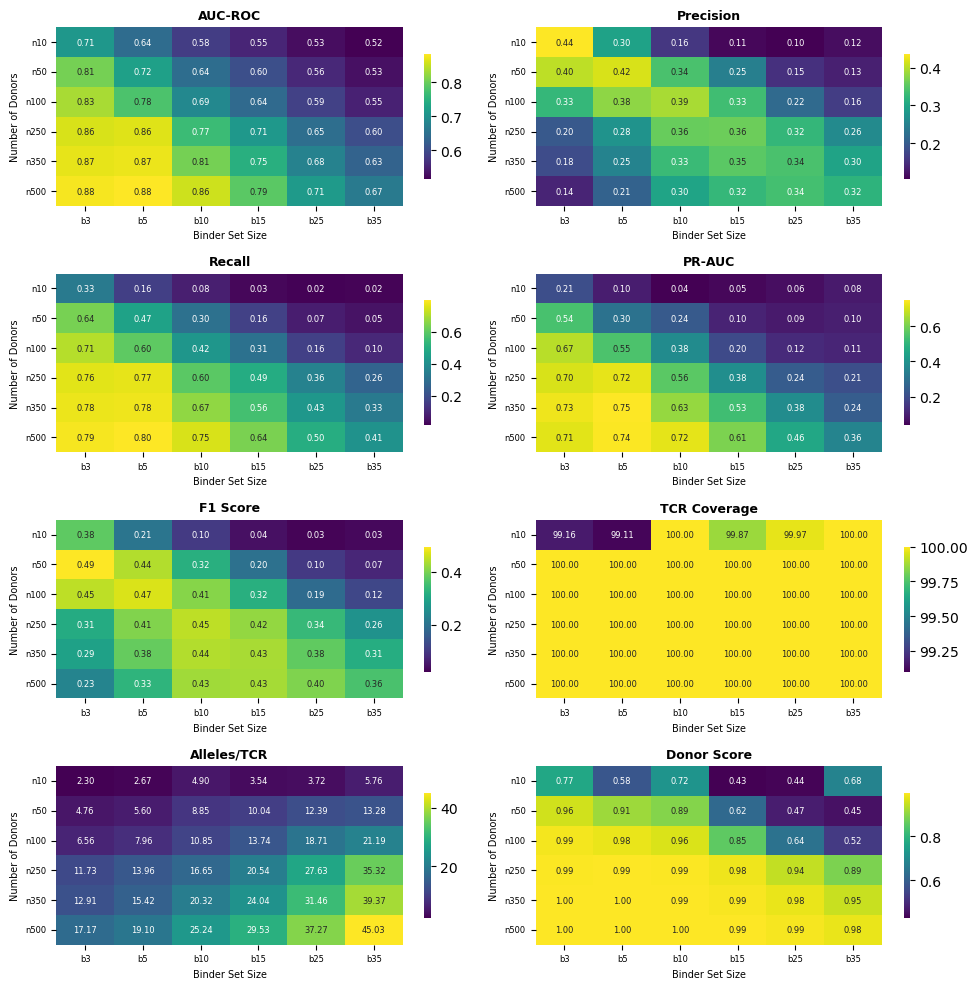

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

ALL_FEATURES = ['1_auc_roc', '2_precision', '3_recall', '4_pr_curve_ap', 
                '5_f1_score', '6_tcr_coverage_pct', '7_avg_alleles_per_tcr', 
                '8_donor_explanation_mean_score']

# Clean display names
FEATURE_NAMES = {
    '1_auc_roc': 'AUC-ROC',
    '2_precision': 'Precision',
    '3_recall': 'Recall',
    '4_pr_curve_ap': 'PR-AUC',
    '5_f1_score': 'F1 Score',
    '6_tcr_coverage_pct': 'TCR Coverage',
    '7_avg_alleles_per_tcr': 'Alleles/TCR',
    '8_donor_explanation_mean_score': 'Donor Score'
}

# Get column/index structure
columns = [f'b{j}' for j in np.sort(np.array(list(set([int(i.split('_')[0].replace('b','')) for i in data_reg.keys()]))))]
indexes = [f'n{j}' for j in np.sort(np.array(list(set([int(i.split('_')[1].replace('n','')) for i in data_reg.keys()]))))]

# Create figure: 4 rows x 4 cols (reg and noreg side by side for each feature)
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
axes = axes.flatten()

for idx, feature in enumerate(ALL_FEATURES):
    # Build DataFrames for this feature
    df_reg = pd.DataFrame(columns=columns, index=indexes)
    df_noreg = pd.DataFrame(columns=columns, index=indexes)
    
    for key in data_reg.keys():
        n = key.split('_')[1]
        b = key.split('_')[0]
        df_reg.loc[n, b] = float(data_reg[key][feature])
        df_noreg.loc[n, b] = float(data_noreg[key][feature])
    
    df_reg = df_reg.astype(float)
    df_noreg = df_noreg.astype(float)
    
    # Shared color scale
    vmin = min(df_reg.min().min(), df_noreg.min().min())
    vmax = max(df_reg.max().max(), df_noreg.max().max())
    
    # Plot heatmap
    ax = axes[idx]
    sns.heatmap(df_reg, ax=ax, annot=True, fmt='.2f', cmap='viridis',
                vmin=vmin, vmax=vmax, cbar=True, 
                annot_kws={'size': 6}, cbar_kws={'shrink': 0.7})
    ax.set_title(FEATURE_NAMES[feature], fontsize=9, fontweight='bold')
    ax.set_xlabel('Binder Set Size', fontsize=7)
    ax.set_ylabel('Number of Donors', fontsize=7)
    ax.tick_params(labelsize=6)

plt.tight_layout()
plt.savefig('/home/amir/TCRtyper/output/synthetic_analysis_with_reg/heatmap.png', dpi=600)
plt.show()

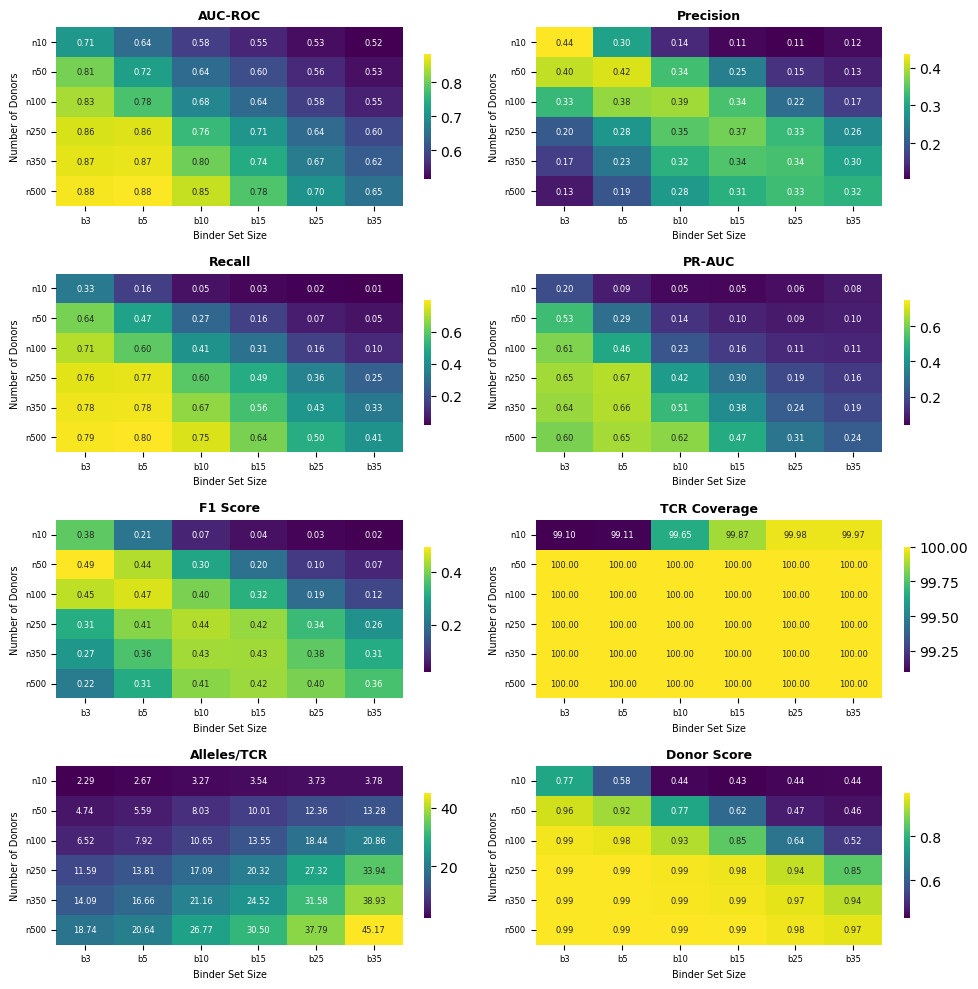

In [47]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

ALL_FEATURES = ['1_auc_roc', '2_precision', '3_recall', '4_pr_curve_ap', 
                '5_f1_score', '6_tcr_coverage_pct', '7_avg_alleles_per_tcr', 
                '8_donor_explanation_mean_score']

# Clean display names
FEATURE_NAMES = {
    '1_auc_roc': 'AUC-ROC',
    '2_precision': 'Precision',
    '3_recall': 'Recall',
    '4_pr_curve_ap': 'PR-AUC',
    '5_f1_score': 'F1 Score',
    '6_tcr_coverage_pct': 'TCR Coverage',
    '7_avg_alleles_per_tcr': 'Alleles/TCR',
    '8_donor_explanation_mean_score': 'Donor Score'
}

# Get column/index structure
columns = [f'b{j}' for j in np.sort(np.array(list(set([int(i.split('_')[0].replace('b','')) for i in data_reg.keys()]))))]
indexes = [f'n{j}' for j in np.sort(np.array(list(set([int(i.split('_')[1].replace('n','')) for i in data_reg.keys()]))))]

# Create figure: 4 rows x 4 cols (reg and noreg side by side for each feature)
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
axes = axes.flatten()

for idx, feature in enumerate(ALL_FEATURES):
    # Build DataFrames for this feature
    df_reg = pd.DataFrame(columns=columns, index=indexes)
    df_noreg = pd.DataFrame(columns=columns, index=indexes)
    
    for key in data_reg.keys():
        n = key.split('_')[1]
        b = key.split('_')[0]
        df_reg.loc[n, b] = float(data_reg[key][feature])
        df_noreg.loc[n, b] = float(data_noreg[key][feature])
    
    df_reg = df_reg.astype(float)
    df_noreg = df_noreg.astype(float)
    
    # Shared color scale
    vmin = min(df_reg.min().min(), df_noreg.min().min())
    vmax = max(df_reg.max().max(), df_noreg.max().max())
    
    # Plot heatmap
    ax = axes[idx]
    sns.heatmap(df_noreg, ax=ax, annot=True, fmt='.2f', cmap='viridis',
                vmin=vmin, vmax=vmax, cbar=True, 
                annot_kws={'size': 6}, cbar_kws={'shrink': 0.7})
    ax.set_title(FEATURE_NAMES[feature], fontsize=9, fontweight='bold')
    ax.set_xlabel('Binder Set Size', fontsize=7)
    ax.set_ylabel('Number of Donors', fontsize=7)
    ax.tick_params(labelsize=6)

plt.tight_layout()
plt.savefig('/home/amir/TCRtyper/output/synthetic_analysis_without_reg/heatmap.png', dpi=600)
plt.show()

In [48]:
import numpy as np
import os
from pathlib import Path
import json
import matplotlib.pyplot as plt

def compute_precision_at_k(output_dir, data_dir, max_k=20, pad_token=-1.):
    """
    Compute Precision@k for k=1,2,...,max_k using saved model outputs.
    
    Precision@k: For each TCR, take the top-k highest confidence predictions.
                 What fraction of those are actually in the true HLA set?
    
    Args:
        output_dir: Path to bX_nY output folder (e.g., 'output/synthetic_analysis_with_reg/b10_n100')
        data_dir: Path to corresponding data folder (e.g., 'data/nikolay/synthetic/synthetic/binder_set/b10/n100/N100000')
        max_k: Maximum k to compute (default 20)
        pad_token: Padding token value (default -1.0)
    
    Returns:
        dict with precision@k values and other stats
    """
    output_dir = Path(output_dir)
    data_dir = Path(data_dir)
    
    # 1. Load predicted probabilities from saved analysis
    arrays_path = output_dir / "figures" / "analysis_arrays.npz"
    arrays = np.load(arrays_path)
    trained_probs = arrays['trained_probs']  # Shape: (num_tcrs, max_candidates)
    
    # 2. Load binder_sets (candidate allele indices) from data
    # Need to reconstruct from h5 file or load if saved
    # Using the same loading logic as in the training loop
    from dataset_processing.utils import PublicTcrHlaCsrReader
    
    h5_path = data_dir / 'synthetic_tcr_hla_counts.h5'
    with PublicTcrHlaCsrReader(str(h5_path)) as reader:
        counts_set, max_all = reader.read_sparse_indices()
    
    # Pad to array
    num_tcrs = len(counts_set)
    binder_sets = np.full((num_tcrs, max_all), pad_token)
    for i, row in enumerate(counts_set):
        binder_sets[i, :len(row)] = row
    
    # 3. Load true HLA set (ground truth)
    true_hla_set = np.load(data_dir / "synthetic_binder_sets.npy")
    
    # 4. Build true allele sets for fast lookup
    print(f"Building true allele lookup for {num_tcrs} TCRs...")
    true_allele_sets = []
    for i in range(num_tcrs):
        valid_mask = true_hla_set[i] >= 0
        true_allele_sets.append(set(true_hla_set[i][valid_mask].astype(int)))
    
    # 5. Compute Precision@k
    print(f"Computing Precision@k for k=1 to {max_k}...")
    
    # For each TCR, sort predictions by probability (descending)
    # and check if top-k are in true set
    
    precision_at_k = {k: [] for k in range(1, max_k + 1)}
    recall_at_k = {k: [] for k in range(1, max_k + 1)}
    
    for i in range(num_tcrs):
        # Get valid candidates (non-padded)
        valid_mask = binder_sets[i] != pad_token
        candidate_ids = binder_sets[i][valid_mask].astype(int)
        candidate_probs = trained_probs[i][valid_mask]
        
        # Sort by probability descending
        sorted_indices = np.argsort(-candidate_probs)
        sorted_candidate_ids = candidate_ids[sorted_indices]
        
        true_set = true_allele_sets[i]
        num_true = len(true_set)
        
        # Compute precision@k and recall@k for each k
        hits_so_far = 0
        for k in range(1, min(max_k + 1, len(sorted_candidate_ids) + 1)):
            # Check if the k-th prediction (0-indexed: k-1) is correct
            if sorted_candidate_ids[k-1] in true_set:
                hits_so_far += 1
            
            precision_at_k[k].append(hits_so_far / k)
            recall_at_k[k].append(hits_so_far / num_true if num_true > 0 else 0.0)
        
        # For k > number of candidates, precision stays the same
        for k in range(len(sorted_candidate_ids) + 1, max_k + 1):
            precision_at_k[k].append(hits_so_far / k)
            recall_at_k[k].append(hits_so_far / num_true if num_true > 0 else 0.0)
    
    # 6. Aggregate results
    results = {
        'mean_precision_at_k': {k: np.mean(v) for k, v in precision_at_k.items()},
        'std_precision_at_k': {k: np.std(v) for k, v in precision_at_k.items()},
        'mean_recall_at_k': {k: np.mean(v) for k, v in recall_at_k.items()},
        'std_recall_at_k': {k: np.std(v) for k, v in recall_at_k.items()},
        'num_tcrs': num_tcrs,
    }
    
    # Print summary
    print("\n" + "="*60)
    print("PRECISION@K RESULTS")
    print("="*60)
    print(f"{'k':<5} | {'Precision@k':>12} | {'Recall@k':>12}")
    print("-"*40)
    for k in [1, 2, 3, 5, 10, 15, 20]:
        if k <= max_k:
            print(f"{k:<5} | {results['mean_precision_at_k'][k]:>12.4f} | {results['mean_recall_at_k'][k]:>12.4f}")
    
    return results


def compute_precision_at_k_all_configs(base_output_dir, base_data_dir, reg_type='with_reg', max_k=20):
    """
    Compute Precision@k for all bX_nY configurations.
    
    Args:
        base_output_dir: e.g., '/home/amir/TCRtyper/output'
        base_data_dir: e.g., '../data/nikolay/synthetic/synthetic/binder_set'
        reg_type: 'with_reg' or 'without_reg'
        max_k: Maximum k to compute
    
    Returns:
        dict mapping config_name -> precision@k results
    """
    output_base = Path(base_output_dir) / f'synthetic_analysis_{reg_type}'
    data_base = Path(base_data_dir)
    
    # Find all bX_nY directories
    config_dirs = [d for d in output_base.iterdir() if d.is_dir() and d.name.startswith('b')]
    
    all_results = {}
    
    for config_dir in sorted(config_dirs):
        config_name = config_dir.name  # e.g., 'b10_n100'
        
        # Parse b and n values
        parts = config_name.split('_')
        b_val = parts[0]  # 'b10'
        n_val = parts[1]  # 'n100'
        
        # Construct data path
        data_dir = data_base / b_val / n_val / 'N100000'
        
        if not data_dir.exists():
            print(f"Warning: Data dir not found for {config_name}: {data_dir}")
            continue
        
        print(f"\n{'='*60}")
        print(f"Processing {config_name}...")
        print(f"{'='*60}")
        
        try:
            results = compute_precision_at_k(
                output_dir=config_dir,
                data_dir=data_dir,
                max_k=max_k
            )
            all_results[config_name] = results
        except Exception as e:
            print(f"Error processing {config_name}: {e}")
            continue
    
    return all_results


def plot_precision_at_k_heatmap(all_results, k_values=[1, 2, 3, 5, 10], output_path=None):
    """
    Create heatmaps of Precision@k across different b and n configurations.
    
    Args:
        all_results: Output from compute_precision_at_k_all_configs
        k_values: Which k values to plot
        output_path: Path to save the plot (optional)
    """
    import pandas as pd
    import seaborn as sns
    
    # Extract unique b and n values
    b_vals = sorted(set(int(k.split('_')[0].replace('b', '')) for k in all_results.keys()))
    n_vals = sorted(set(int(k.split('_')[1].replace('n', '')) for k in all_results.keys()))
    
    columns = [f'b{b}' for b in b_vals]
    indexes = [f'n{n}' for n in n_vals]
    
    fig, axes = plt.subplots(1, len(k_values), figsize=(5*len(k_values), 4))
    if len(k_values) == 1:
        axes = [axes]
    
    for ax, k in zip(axes, k_values):
        df = pd.DataFrame(columns=columns, index=indexes, dtype=float)
        
        for config_name, results in all_results.items():
            n = config_name.split('_')[1]
            b = config_name.split('_')[0]
            df.loc[n, b] = results['mean_precision_at_k'][k]
        
        df = df.astype(float)
        sns.heatmap(df, annot=True, fmt='.3f', cmap='viridis', ax=ax, vmin=0, vmax=1)
        ax.set_title(f'Precision@{k}')
        ax.set_xlabel('Binder Set Size (b)')
        ax.set_ylabel('Number of Donors (n)')
    
    plt.tight_layout()
    
    if output_path:
        plt.savefig(output_path, dpi=150, bbox_inches='tight')
        print(f"Plot saved to {output_path}")
    
    plt.show()
    
    return fig


def plot_precision_at_k_curves(all_results, configs_to_plot=None, max_k=20, output_path=None):
    """
    Plot Precision@k curves for selected configurations.
    
    Args:
        all_results: Output from compute_precision_at_k_all_configs
        configs_to_plot: List of config names to plot (None = plot all)
        max_k: Maximum k on x-axis
        output_path: Path to save the plot (optional)
    """
    if configs_to_plot is None:
        configs_to_plot = list(all_results.keys())
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    colors = plt.cm.tab20(np.linspace(0, 1, len(configs_to_plot)))
    
    for config_name, color in zip(sorted(configs_to_plot), colors):
        if config_name not in all_results:
            continue
        
        results = all_results[config_name]
        k_vals = list(range(1, max_k + 1))
        precisions = [results['mean_precision_at_k'][k] for k in k_vals]
        
        ax.plot(k_vals, precisions, marker='o', markersize=3, label=config_name, color=color)
    
    ax.set_xlabel('k')
    ax.set_ylabel('Precision@k')
    ax.set_title('Precision@k Curves')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, max_k + 1)
    ax.set_ylim(0, 1.05)
    
    plt.tight_layout()
    
    if output_path:
        plt.savefig(output_path, dpi=150, bbox_inches='tight')
        print(f"Plot saved to {output_path}")
    
    plt.show()
    
    return fig


Processing b10_n10...
Building true allele lookup for 100000 TCRs...
Computing Precision@k for k=1 to 20...

PRECISION@K RESULTS
k     |  Precision@k |     Recall@k
----------------------------------------
1     |       0.2268 |       0.0227
2     |       0.1973 |       0.0395
3     |       0.1827 |       0.0548
5     |       0.1631 |       0.0816
10    |       0.1267 |       0.1267
15    |       0.1062 |       0.1593
20    |       0.0929 |       0.1858

Processing b10_n100...
Building true allele lookup for 100000 TCRs...
Computing Precision@k for k=1 to 20...

PRECISION@K RESULTS
k     |  Precision@k |     Recall@k
----------------------------------------
1     |       0.9041 |       0.0904
2     |       0.8500 |       0.1700
3     |       0.7866 |       0.2360
5     |       0.6603 |       0.3302
10    |       0.4198 |       0.4198
15    |       0.3070 |       0.4606
20    |       0.2428 |       0.4856

Processing b10_n250...
Building true allele lookup for 100000 TCRs...
Computing 

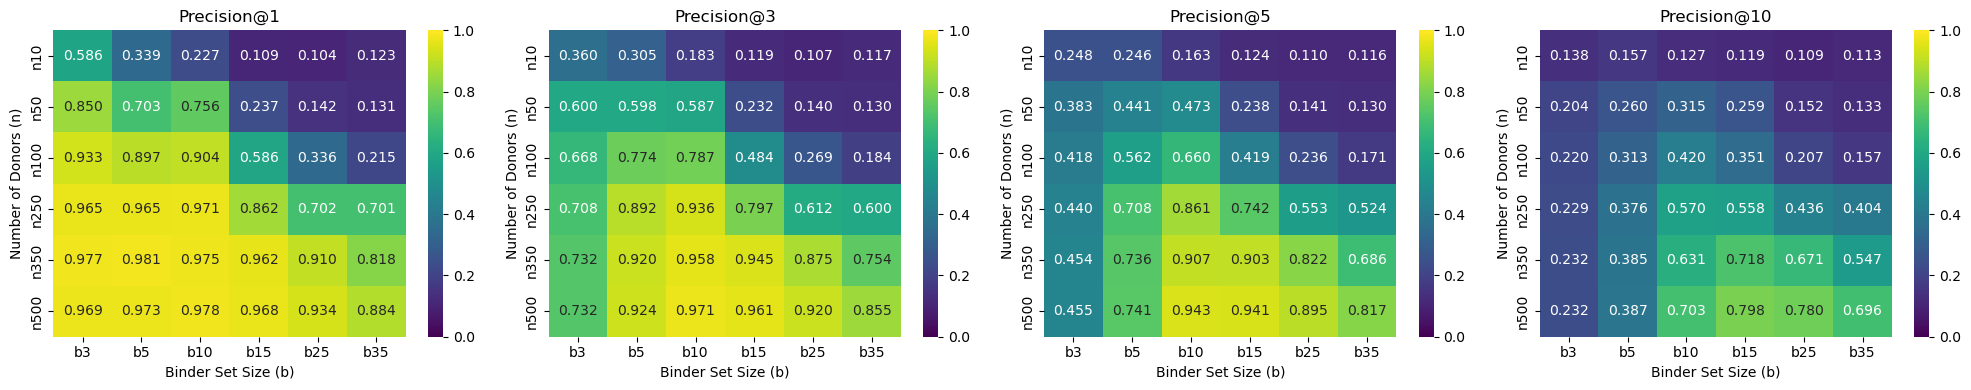

Plot saved to precision_at_k_curves.png


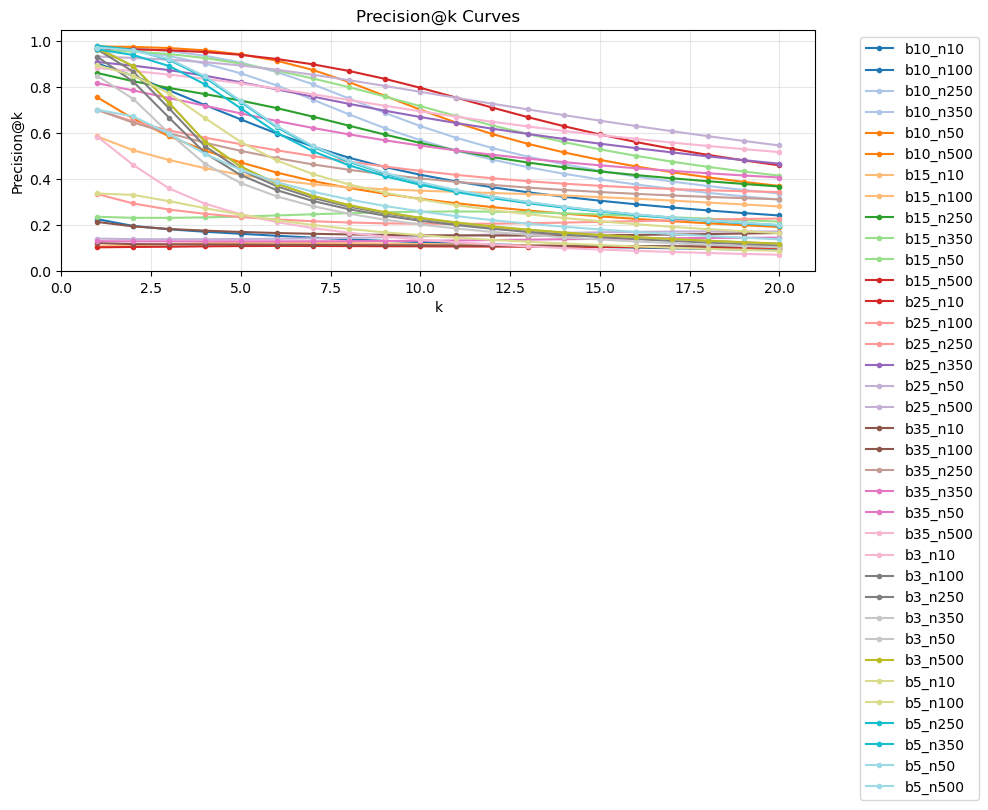

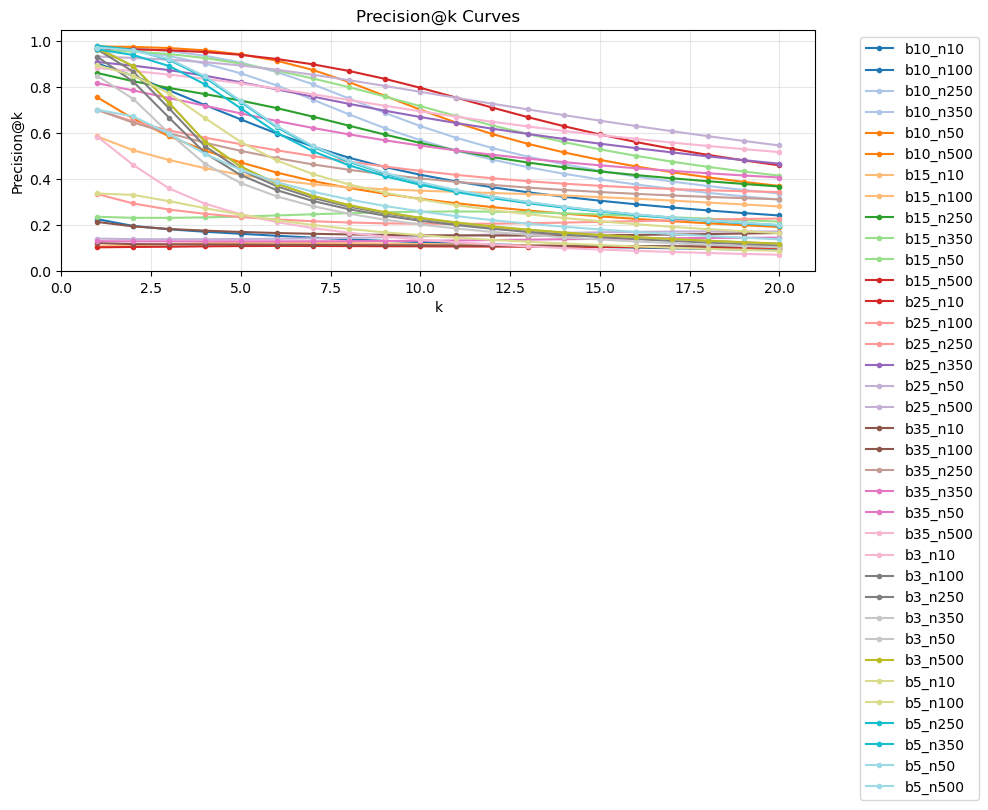

In [49]:
# For all configurations:
all_results_reg = compute_precision_at_k_all_configs(
    base_output_dir='/home/amir/TCRtyper/output',
    base_data_dir='../data/nikolay/synthetic/synthetic/binder_set',
    reg_type='with_reg',
    max_k=20
)

# Create heatmaps for P@1, P@3, P@5, P@10
plot_precision_at_k_heatmap(all_results_reg, k_values=[1, 3, 5, 10], 
                            output_path='precision_at_k_heatmap.png')

# Create curves
plot_precision_at_k_curves(all_results_reg, max_k=20,
                           output_path='precision_at_k_curves.png')

In [31]:
from dataset_processing.utils import PublicTcrHlaCsrReader
with PublicTcrHlaCsrReader("/home/amir/TCRtyper/data/nikolay/train_ds_cluster.h5") as reader:
    for chunk in reader.iter_cluster_chunks(chunk_rows=100):
        print(chunk.raw_csr_tcr_indptr)
        break

[  0   4   6  14  20  32  37  39  41  43  46  49  68  71  74  80  83  93
  94 100 107 111 114 116 120 122 124 128 131 138 142 144 147 150 152 155
 159 162 164 166 168 170 172 175 177 179 181 184 186 188 196 201 204 215
 217 218 220 223 228 233 235 241 244 248 259 261 263 266 270 273 277 278
 280 281 283 285 286 292 296 298 302 306 312 315 317 319 321 324 326 328
 330 332 334 336 338 341 345 347 349 351 353]
